## A Gentle Guide to fundamental techniques used by gradient descent optimizers like SGD, Momentum, RMSProp, Adam, and others, in plain 

Optimizers are a critical component of a Neural Network architecture. During training, they play a key role in helping the network learn to make better and better predictions.

They do this by finding the optimal set of model parameters like weights and biases so that the model can produce the best outputs for the problem they’re solving.

The most common optimization technique used by most neural networks is gradient descent.

Most popular deep learning libraries, such as Pytorch and Keras, have a plethora of built-in optimizers based on gradient descent eg. SGD, Adadelta, Adagrad, RMSProp, Adam, and so on.

Why are there so many different optimization algorithms? How do we decide which one to choose?

### Review of Optimization with Gradient Descent
Loss Curve
Let’s start with a typical 3D picture of the gradient descent algorithm at work.

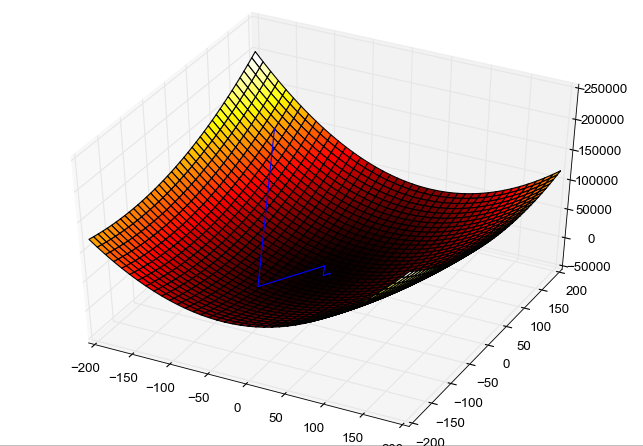

This picture shows a network with two weight parameters:

The horizontal plane has two axes, for weights w1 and w2 respectively.
The vertical axis shows the value of the loss, for each combination of the weights

In other words, the shape of the curve shows the “Loss Landscape” for the neural network. It plots the loss for different values of the weights, while we keep the input dataset fixed.

The blue line plots the trajectory of the gradient descent algorithm during optimization:
- It starts off by choosing some random values for both weights and computes the loss value.
- At each iteration, as it updates its weight values, resulting in a lower loss (hopefully), it moves to a lower point along the curve
- Finally, it arrives at its objective which is the bottom of the curve where the loss is lowest.

#### Computing the Gradient
The algorithm updates weights based on the gradient of the loss curve at that point, and a learning rate factor.

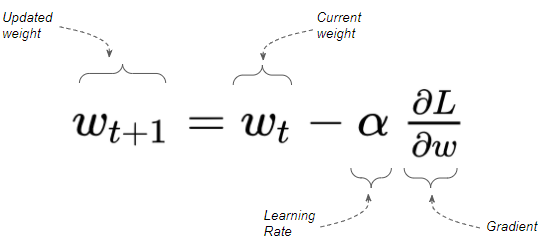

The gradient measures the slope and is the change in the vertical direction ( dL) divided by the change in the horizontal direction (dW). This means that the gradient is large for steep slopes and small for gentle slopes.

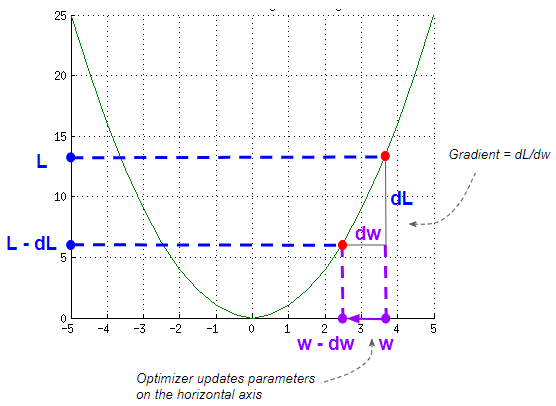

#### Gradient Descent in Practice

These loss curves are a useful visualization to understand the concept of gradient descent. However, we should realize that this is an idealized scenario, not a realistic one:

The picture above shows a smooth convex-shaped curve. In reality, the curve is very bumpy.

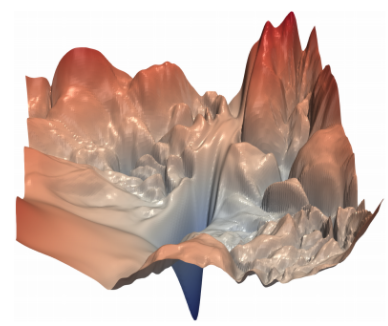

    - Secondly, we are not going to have just 2 parameters. There are often tens or hundreds of millions, and it is impossible to visualize or even imagine that in your head.
    At each iteration, gradient descent works by “looking in all directions to find the best slope that it can go down”. So what happens when the best slope isn’t the best direction to take?

`What if the landscape slopes steeply in one direction but the lowest point is in the direction of the more gentle slope?`
`Or what if the landscape all around is fairly flat?`
`Or if it goes down a deep ditch how does it climb out of it?`

### Challenges with Gradient Descent Optimization
1. Local Minima
    In a typical loss curve, you might have many local minima in addition to the global minimum. Because Gradient Descent is designed to keep going downwards, once it goes down a local minimum, it finds it very difficult to climb back up the slope. So it might get stuck there without reaching the global minimum.

    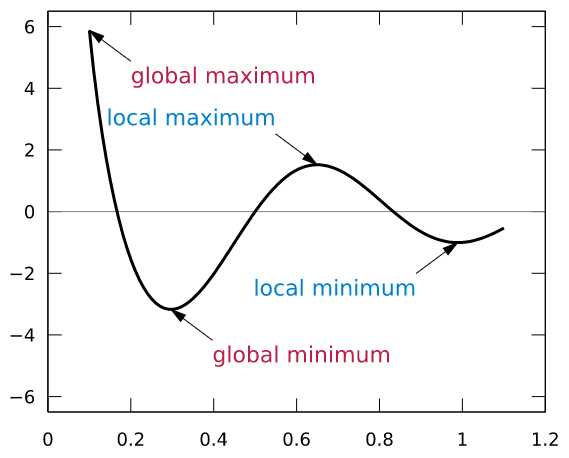

2. Saddle points
    Another key challenge is the occurrence of “saddle points”. This is a point where, in one direction corresponding to one parameter, the curve is at a local minimum. On the other hand, in a second direction corresponding to another parameter, the curve is at a local maximum.

    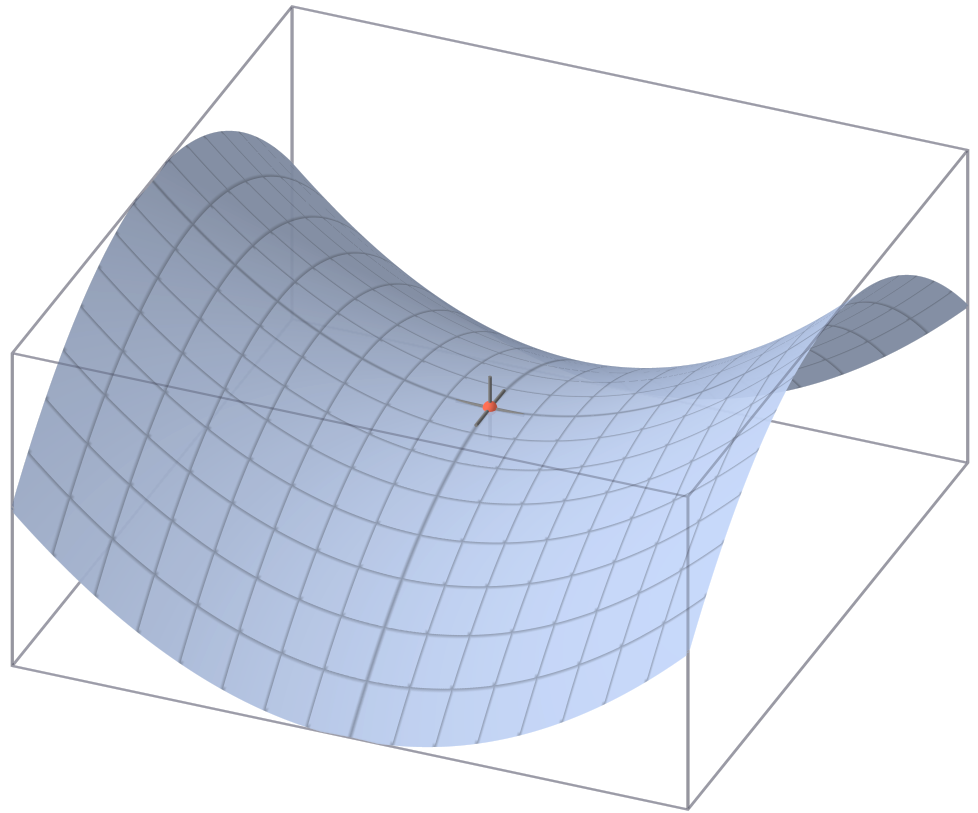

    What makes saddle points tricky, is that the area immediately around the saddle point is usually fairly flat, like a plateau. This means that the gradients are close to zero. This causes the optimizer to oscillate around the saddle point, in the direction of the first parameter, without being able to descend down the slope in the direction of the second parameter.

The gradient descent thus incorrectly assumes that it has found the minimum.

3. Ravines

    Gradient Descent also finds it hard to traverse ravines. This is a long narrow valley that slopes steeply in one direction (ie. the sides of the valley) and gently (ie. along the valley) in the second direction. Often this ravine leads down to the minimum. Because it is difficult to navigate, this shape is also called Pathological Curvature.

    Think of this like a narrow river valley that slopes down gently from the hills till it ends in a lake. What you want to do is move quickly downriver in the direction of the valley. However, it is very easy for gradient descent to bounce back and forth along the sides of the valley and move very slowly in the direction of the river.

Although they continue to use gradient descent at the core, optimization algorithms have developed a series of improvements on the vanilla gradient descent, to tackle these challenges.

### First Improvement to Gradient Descent — Stochastic Gradient Descent (SGD)
Gradient Descent usually means “full-batch gradient descent”, where the loss and gradient are calculated using all the items in the dataset.

Instead, Mini-batch Stochastic Gradient Descent takes a randomly selected subset of the dataset for each training iteration.

That randomness helps us explore the loss landscape.

Earlier we had mentioned that the loss curve is obtained by varying the model parameters while keeping the input dataset fixed. However, if you vary the input by selecting different data samples in each mini-batch, the loss value and gradients will vary also. In other words, by varying the input dataset, you get a slightly different loss curve with each mini-batch.

So even though you get stuck at someplace in the landscape in one mini-batch, you might see a different landscape for the next mini-batch, which lets you keep moving. This prevents the algorithm from getting stuck in a particular section of the landscape, especially in the early stages of training.

### Second Improvement to Gradient Descent — Momentum
#### Adjust the Update Amount dynamically
One of the tricky aspects of Gradient Descent is dealing with steep slopes. Because the gradient is large there, you could take a large step when you actually want to go slowly and cautiously. This could result in bouncing back and forth, thus slowing down the training.

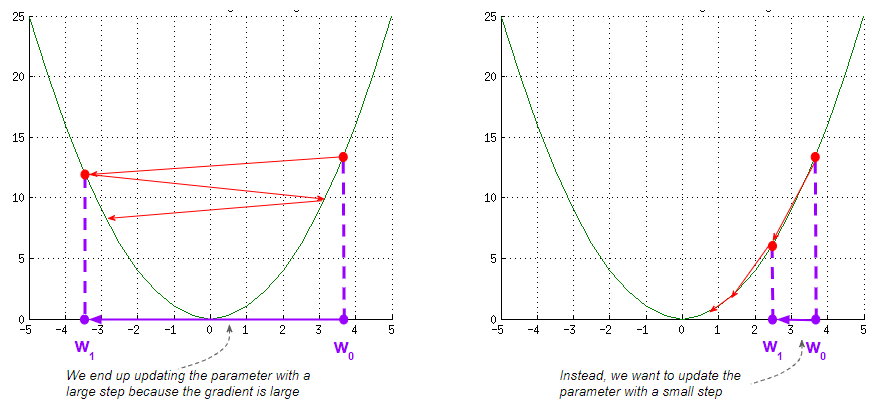

Ideally, you want to vary the magnitude of the update dynamically so you can respond to changes in the landscape around you. If the slope is very steep you want to slow down. If the slope is very flat you might want to speed up and so on.

With Gradient Descent you make an update to the weights at each step, based on the gradient and the learning rate. Therefore, to modify the size of the update, there are two things you can do:

Adjust the gradient
Adjust the learning rate

#### Momentum vs SGD
Momentum is a way to do the former above ie. adjust the gradient.

With SGD we look only at the current gradient and ignore all the past gradients. This means that if there is a sudden anomaly in the loss curve, your trajectory may get thrown off course.

When using Momentum, on the other hand, you let the past gradients guide your overall direction so that you stay on course. This lets you use the knowledge of the surrounding landscape that you had seen up until that point, and helps dampen the effect of outliers in the loss curve

1. The first question is how far in the past do you go? The further back you go, the less you will be affected by anomalies.
2. Secondly, does every gradient from the past count equally? It would make sense that things from the recent past should count more than things from the distant past. So if the change in the landscape is not an anomaly, but a genuine structural change, then you do need to react to it and change your course gradually.
The Momentum algorithm uses the exponential moving average of the gradient, instead of the current gradient value.

##### Traverse Ravines using Momentum
Momentum helps you tackle the narrow ravine problem of pathological curvature, where the gradient is very high for one weight parameter but very low for another parameter.
By using momentum, you dampen the zig-zag oscillations that would happen with SGD.

1. For the first parameter with the steep slope, the large gradient causes a ‘zig’ from one side of the valley to the other. However, in the next step, this gets canceled out by the ‘zag’ in the reverse direction.
2. On the other hand for the second parameter, the small updates from the first step are reinforced by the small updates for the second step because they are in the same direction. This is the direction along the valley in which you want to go.
Some examples of Optimizer algorithms that use Momentum using different formulae are:

SGD with Momentum
Nestorov Accelerated Gradient

### Third Improvement to Gradient Descent — Modify Learning Rate (based on the gradient)
As mentioned above, the second way to modify the amount of the parameter update is by adjusting the learning rate.

So far, we have been keeping the learning rate constant from one iteration to the next. Secondly, the gradient updates are using the same learning rate for all parameters.

However, as we have seen there might be large variations between the gradients of different parameters. One parameter might have a steep slope while another has a gentle slope.

We can make use of this to adapt the learning rate to each parameter. We can make use of past gradients (for each parameter separately) to choose the learning rate for that parameter.

There are a few Optimizer algorithms that do this, using slightly different techniques eg. Adagrad, Adadelta, RMS Prop.

For instance, Adagrad squares the past gradients and adds them up, weighting all of them equally. RMSProp also squares the past gradients but uses their exponential moving average, thus giving more importance to recent gradients.

Now, by squaring the gradients, they all become positive ie. have the same direction. This negates the canceling out effect that we talked about for Momentum, with gradients in opposite directions.

This means that for a parameter that has a steep slope, the gradients are large and the squares of the gradients are really large and always positive, so they accumulate fast. To dampen this, the algorithm calculates the learning rate by dividing the accumulated squared gradients by a larger factor. This allows it to slow down on steep slopes.

Similarly, for shallower slopes, the accumulation is small and so the algorithm divides the accumulated squares by a smaller factor to compute the learning rate. This boosts the learning rate for gentle slopes.

Some Optimizer algorithms combine both approaches — modify the learning rate as above as well as use Momentum to modify the gradient. eg. Adam and its many variants, LAMB.

### Fourth Improvement to Gradient Descent — Modify Learning Rate (based on your training progress)
In the previous section, the learning rate was modified based on the gradients of the parameters. In addition, we can adjust the learning rate based on the progression of the training process. The learning rate is set based on the training epoch and is independent of the model’s parameters at that point.

This is actually not done by Optimizers at all. It is, in fact, a separate component of the neural network known as a Scheduler. I am mentioning this for completeness and to show the relationship with the Optimization techniques we’ve discussed, but will not cover them further here.


